In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('traffic_index.csv') #write your data path
df.head()

,City,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
0,Abudhabi,2023-07-07 08:01:30,6,4,15.6,0.7,13,59.611918,54.803617
1,Abudhabi,2023-07-07 09:01:30,7,7,20.5,1.7,8,60.221387,56.118629
2,Abudhabi,2023-07-07 10:46:30,7,8,25.0,2.8,6,59.161978,55.518834
3,Abudhabi,2023-07-07 11:16:30,8,11,30.6,5.5,6,59.738138,56.413917
4,Abudhabi,2023-07-07 12:01:30,8,20,62.1,6.5,5,58.958314,56.059246


Data cleaning

In [75]:
df.isnull().sum()

City                      0
Datetime                  0
TrafficIndexLive          0
JamsCount                 0
JamsDelay                 0
JamsLength                0
TrafficIndexWeekAgo       0
TravelTimeHistoric     3867
TravelTimeLive         3867
dtype: int64

# Meanning of each index

**City:** Name of the city where traffic data is recorded.      
**Datetime:** Timestamp of the traffic data.          
**TrafficIndexLive:** Current traffic index (live).        
**JamsCount:** Number of traffic jams recorded.       
**JamsDelay:** Delay caused by traffic jams.        
**JamsLength:** Length of traffic jams in the city.       
**TrafficIndexWeekAgo:** Traffic index from one week ago for comparison.      
**TravelTimeHistoric:** Historical travel time.       
**TravelTimeLive:** Current travel time.

In [76]:
df.describe()
#delete jams delay, james count, james length, TrafficIndexWeekAgo

,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
count,66639.000000,66639.000000,66639.000000,66639.000000,66639.000000,62772.000000,62772.000000
mean,14.043113,74.278531,288.353877,49.316135,13.981737,70.706601,70.048451
std,13.488906,107.452022,470.013224,85.352525,13.454922,10.588384,11.966725
min,0.000000,0.000000,0.000000,0.000000,0.000000,49.381346,46.723235
25%,3.000000,9.000000,27.700000,3.000000,3.000000,63.142591,60.712805
50%,10.000000,29.000000,95.700000,12.200000,10.000000,68.894790,68.247303
75%,21.000000,95.000000,336.600000,53.500000,21.000000,76.250975,77.043739
max,138.000000,1359.000000,9989.400000,1173.900000,138.000000,120.140593,134.484139


In [77]:
live_avg= df['TravelTimeLive'].mean()
historic_avg= df['TravelTimeHistoric'].mean()
df.fillna({'TravelTimeLive': live_avg, 'TravelTimeHistoric': historic_avg}, inplace=True)

In [78]:
df.isnull().sum()

City                   0
Datetime               0
TrafficIndexLive       0
JamsCount              0
JamsDelay              0
JamsLength             0
TrafficIndexWeekAgo    0
TravelTimeHistoric     0
TravelTimeLive         0
dtype: int64

### Checking For Wrong Data Types

In [79]:
df.dtypes

City                    object
Datetime                object
TrafficIndexLive         int64
JamsCount                int64
JamsDelay              float64
JamsLength             float64
TrafficIndexWeekAgo      int64
TravelTimeHistoric     float64
TravelTimeLive         float64
dtype: object

Checking for duplicates

In [80]:
df.duplicated().sum()

0

**Date Type Is Object and it should be Date**

In [81]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.dtypes

City                           object
Datetime               datetime64[ns]
TrafficIndexLive                int64
JamsCount                       int64
JamsDelay                     float64
JamsLength                    float64
TrafficIndexWeekAgo             int64
TravelTimeHistoric            float64
TravelTimeLive                float64
dtype: object

###  Creating New Columns For Year, Month, Day, Hour

In [82]:
df['Year'] = df['Datetime'].dt.year
df['Month'] = df['Datetime'].dt.month_name()
df['MonthNum'] = df['Datetime'].dt.month
df['Day'] = df['Datetime'].dt.day_name()
df['DayNum'] = df['Datetime'].dt.dayofweek
df['Hour'] = df['Datetime'].dt.hour
df.head()

,City,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive,Year,Month,MonthNum,Day,DayNum,Hour
0,Abudhabi,2023-07-07 08:01:30,6,4,15.6,0.7,13,59.611918,54.803617,2023,July,7,Friday,4,8
1,Abudhabi,2023-07-07 09:01:30,7,7,20.5,1.7,8,60.221387,56.118629,2023,July,7,Friday,4,9
2,Abudhabi,2023-07-07 10:46:30,7,8,25.0,2.8,6,59.161978,55.518834,2023,July,7,Friday,4,10
3,Abudhabi,2023-07-07 11:16:30,8,11,30.6,5.5,6,59.738138,56.413917,2023,July,7,Friday,4,11
4,Abudhabi,2023-07-07 12:01:30,8,20,62.1,6.5,5,58.958314,56.059246,2023,July,7,Friday,4,12


### Let's Create Time of Day Column

In [83]:
bins= np.linspace(df['Hour'].min(), df['Hour'].max(), 5)
labels = ['Early Morning (12am-6am)', 'Morning (6am-12pm)', 'Afternoon (12pm-6pm)', 'Evening (6pm-12am)']

df['Time of Day'] = pd.cut(df['Hour'], bins=bins, labels=labels, include_lowest=True)
df.head()


,City,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive,Year,Month,MonthNum,Day,DayNum,Hour,Time of Day
0,Abudhabi,2023-07-07 08:01:30,6,4,15.6,0.7,13,59.611918,54.803617,2023,July,7,Friday,4,8,Morning (6am-12pm)
1,Abudhabi,2023-07-07 09:01:30,7,7,20.5,1.7,8,60.221387,56.118629,2023,July,7,Friday,4,9,Morning (6am-12pm)
2,Abudhabi,2023-07-07 10:46:30,7,8,25.0,2.8,6,59.161978,55.518834,2023,July,7,Friday,4,10,Morning (6am-12pm)
3,Abudhabi,2023-07-07 11:16:30,8,11,30.6,5.5,6,59.738138,56.413917,2023,July,7,Friday,4,11,Morning (6am-12pm)
4,Abudhabi,2023-07-07 12:01:30,8,20,62.1,6.5,5,58.958314,56.059246,2023,July,7,Friday,4,12,Afternoon (12pm-6pm)


# Exploratory Data Analysis(EDA)

In [84]:
# Check for the shape of the dataset
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns")

# Check for data types and missing values
df.info()

# Check for the unique values in each column
df.nunique()

Dataset contains 66639 rows and 16 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66639 entries, 0 to 66638
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   City                 66639 non-null  object        
 1   Datetime             66639 non-null  datetime64[ns]
 2   TrafficIndexLive     66639 non-null  int64         
 3   JamsCount            66639 non-null  int64         
 4   JamsDelay            66639 non-null  float64       
 5   JamsLength           66639 non-null  float64       
 6   TrafficIndexWeekAgo  66639 non-null  int64         
 7   TravelTimeHistoric   66639 non-null  float64       
 8   TravelTimeLive       66639 non-null  float64       
 9   Year                 66639 non-null  int64         
 10  Month                66639 non-null  object        
 11  MonthNum             66639 non-null  int64         
 12  Day                  66639 non-null  object  

City                      11
Datetime               22242
TrafficIndexLive         102
JamsCount                768
JamsDelay              12637
JamsLength              4137
TrafficIndexWeekAgo      102
TravelTimeHistoric     62773
TravelTimeLive         62773
Year                       2
Month                     12
MonthNum                  12
Day                        7
DayNum                     7
Hour                      24
Time of Day                4
dtype: int64

In [85]:
df.describe()

,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive,Year,MonthNum,DayNum,Hour
count,66639.000000,66639.000000,66639.000000,66639.000000,66639.000000,66639.000000,66639.000000,66639.000000,66639.000000,66639.000000,66639.000000
mean,14.043113,74.278531,288.353877,49.316135,13.981737,70.706601,70.048451,2022.972073,7.496856,2.995543,11.499887
std,13.488906,107.452022,470.013224,85.352525,13.454922,10.276571,11.614321,0.164764,3.222785,2.001731,6.926739
min,0.000000,0.000000,0.000000,0.000000,0.000000,49.381346,46.723235,2022.000000,1.000000,0.000000,0.000000
25%,3.000000,9.000000,27.700000,3.000000,3.000000,63.525681,61.195288,2023.000000,5.000000,1.000000,5.000000
50%,10.000000,29.000000,95.700000,12.200000,10.000000,69.682368,69.286516,2023.000000,8.000000,3.000000,12.000000
75%,21.000000,95.000000,336.600000,53.500000,21.000000,75.697609,76.389208,2023.000000,10.000000,5.000000,18.000000
max,138.000000,1359.000000,9989.400000,1173.900000,138.000000,120.140593,134.484139,2023.000000,12.000000,6.000000,23.000000


In [86]:
# Display the column names in the DataFrame
print(df.columns)

Index(['City', 'Datetime', 'TrafficIndexLive', 'JamsCount', 'JamsDelay',
       'JamsLength', 'TrafficIndexWeekAgo', 'TravelTimeHistoric',
       'TravelTimeLive', 'Year', 'Month', 'MonthNum', 'Day', 'DayNum', 'Hour',
       'Time of Day'],
      dtype='object')


## visualization


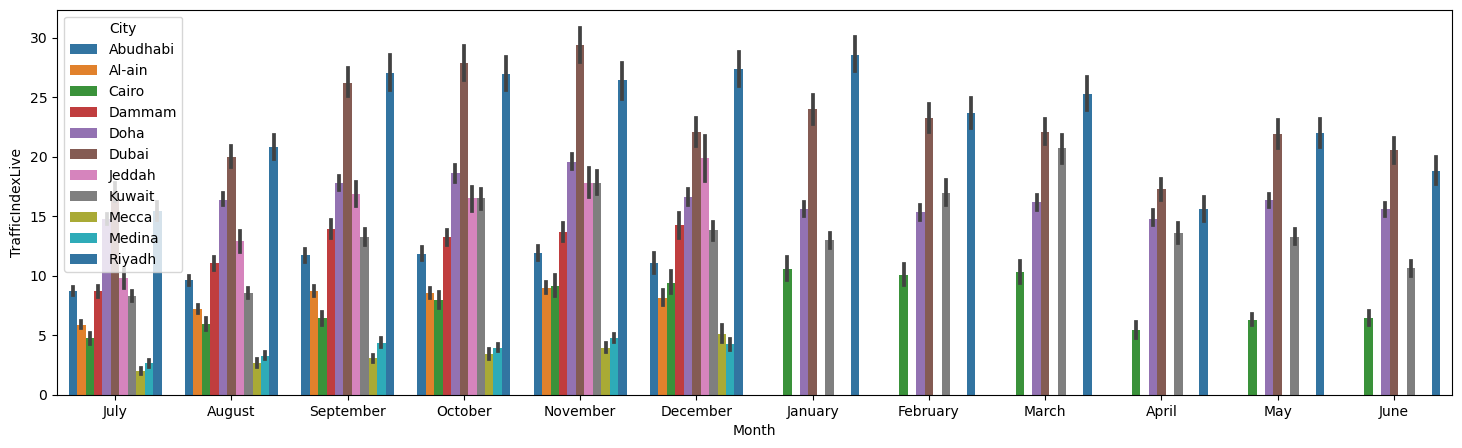

In [87]:
plt.figure(figsize=(18,5))
sns.barplot(x='Month', y='TrafficIndexLive',palette='tab10', hue='City', data=df)
plt.show()


##### Only 5 Cities has the a complete year (12 months) data
##### So we dicided to work only with these 5 cities (Cairo, Doha, Dubai, Kuwait, Riyadh)

In [88]:
months_12 = df[df['City'].isin(["Cairo", "Doha", "Dubai", "Kuwait", "Riyadh"])]
months_6 = df[df['City'].isin(["Abudhabi", "Al-ain", "Dammam", "Jeddah", "Mecca","Medina"])]

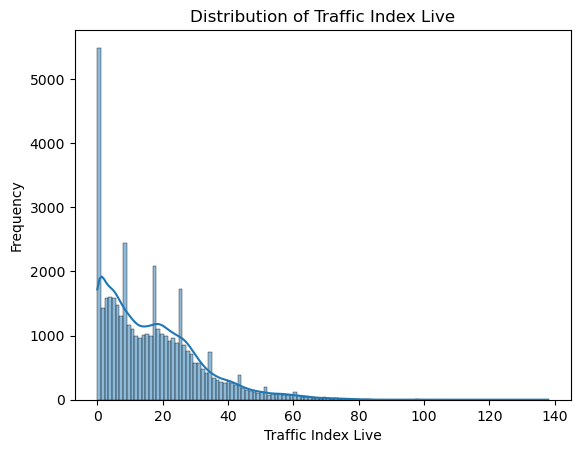

In [89]:
# Plot distribution of the 'TrafficIndexLive' column of the whole data
sns.histplot(months_12['TrafficIndexLive'], kde=True)  # Use the correct column name
plt.title('Distribution of Traffic Index Live')
plt.xlabel('Traffic Index Live')  # Label the x-axis
plt.ylabel('Frequency')  # Label the y-axis
plt.show()

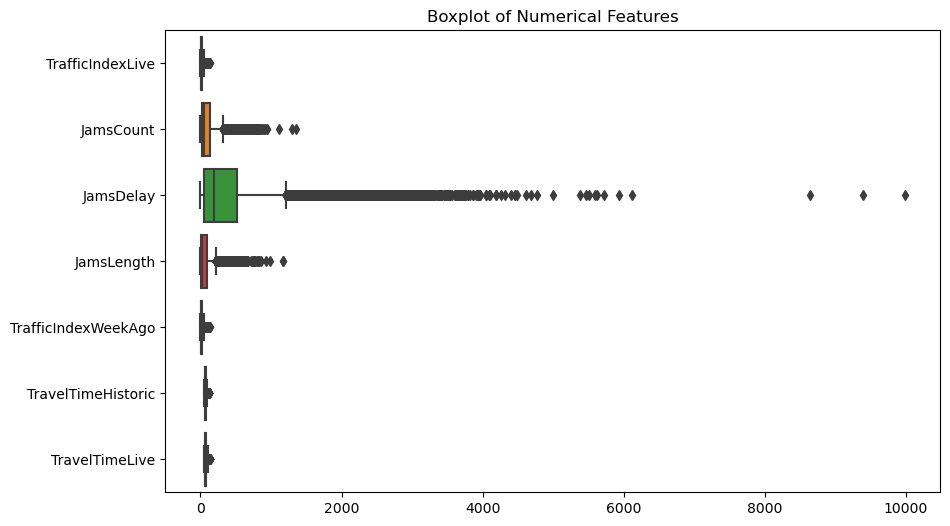

In [90]:
plt.figure(figsize=(10, 6))
columns_to_drop = ['Year', 'MonthNum', 'DayNum', 'Hour']
filtered_data = months_12.drop(columns=columns_to_drop)
sns.boxplot(data=filtered_data.select_dtypes(include='number'), orient='h')
plt.title('Boxplot of Numerical Features')
plt.show()


### Let's See How The Traffic Index differ form each city in differnet moths

In [91]:
monthly_avg = months_12.groupby(['City','Month'])['TrafficIndexLive'].mean().reset_index()
#monthly_avg.sort_values(by='TrafficIndexLive', ascending=False, inplace=True)
monthly_avg.head(100)

,City,Month,TrafficIndexLive
0,Cairo,April,5.405367
1,Cairo,August,5.954301
2,Cairo,December,9.409218
3,Cairo,February,10.029762
4,Cairo,January,10.564516
5,Cairo,July,4.727151
6,Cairo,June,6.404167
7,Cairo,March,10.322581
8,Cairo,May,6.305322
9,Cairo,November,9.138889


In [92]:
monthly_avg['City'].value_counts()
#meanning that the cites that has 12 vlaue counts containes data for the whole year, while 6 is half a yer

Cairo     12
Doha      12
Dubai     12
Kuwait    12
Riyadh    12
Name: City, dtype: int64

In [93]:
import warnings

warnings.filterwarnings('ignore')

### for ("Cairo", "Doha", "Dubai", "Kuwait", "Riyadh") The cities that we will work on them

<Axes: xlabel='Month', ylabel='TrafficIndexLive'>

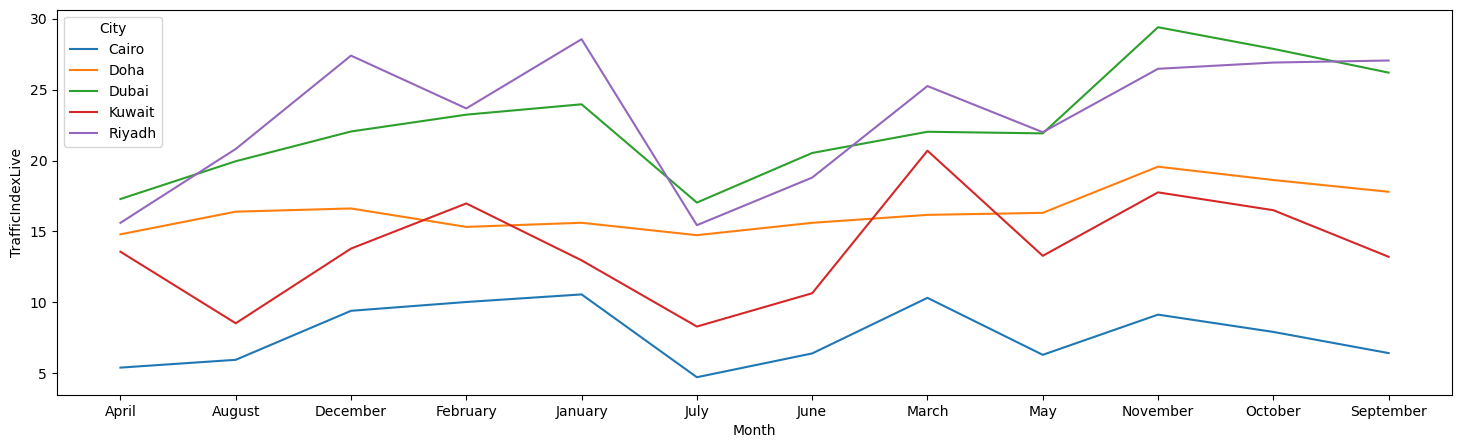

In [94]:
twelve_months_avg = months_12.groupby(['Month','City'])['TrafficIndexLive'].mean().reset_index()
twelve_months_avg.sort_values(by='Month', ascending=True, inplace=True)
plt.figure(figsize=(18,5))
sns.lineplot(x='Month', y='TrafficIndexLive',palette='tab10', hue='City', data=twelve_months_avg)

**Traffic Index Is lower in Month of [July] In All Cities.**

**Higher Traffic Index In Months of [August, September, October, November, December]**

## Comparing The Total Jams Of Cairo, Doha, Dubai, Kuwait, Riyadh.

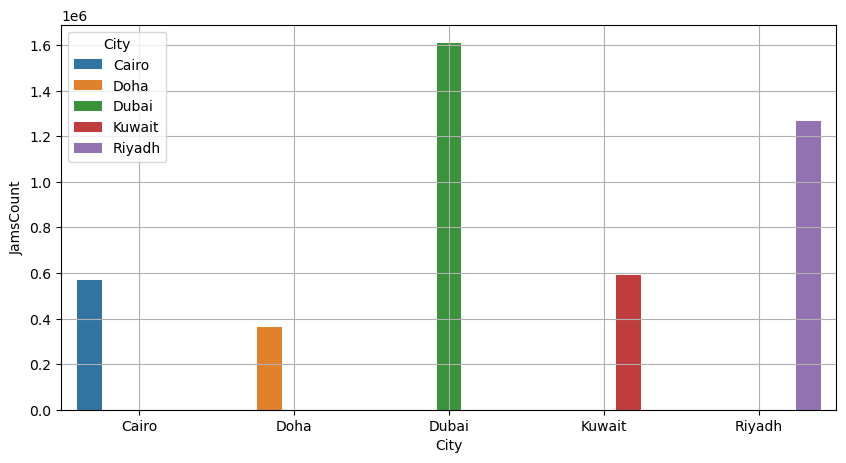

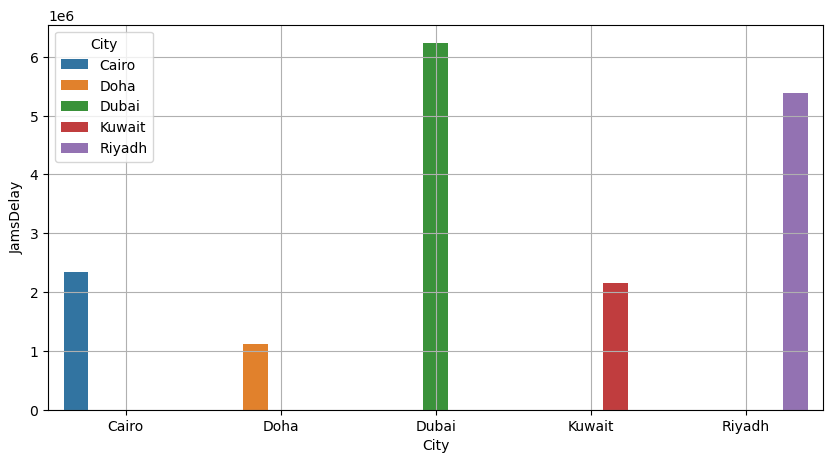

In [95]:
total_jams = months_12.groupby(['City'])['JamsCount'].sum().reset_index()
plt.figure(figsize=(10,5))
sns.barplot(x='City', y='JamsCount',palette='tab10', hue='City', data=total_jams)
plt.grid()
plt.show()
print('\n\n')
#jams Delay
jams_delay = months_12.groupby(['City'])['JamsDelay'].sum().reset_index()
plt.figure(figsize=(10,5))
sns.barplot(x='City', y='JamsDelay',palette='tab10', hue='City', data=jams_delay)
plt.grid()

**We Can Notice That Kuwait Has Higher Total Jams Than Cairo But Seems To Have Lower Jams Delay**

**Dubai Has The Highest Total Jams.**

([<matplotlib.patches.Wedge at 0x176d305e0>,
 [Text(1.0110153155135702, 0.4334143880825787, 'Cairo'),
  Text(0.5281720839519458, 0.9649011606034367, 'Doha'),
  Text(-0.866983691476489, 0.6770075913265673, 'Dubai'),
  Text(-0.6763524955115979, -0.8674948425294725, 'Kuwait'),
  Text(0.6793922348906498, -0.8651162876574965, 'Riyadh')],
 [Text(0.5514628993710382, 0.2364078480450429, '12.9%'),
  Text(0.28809386397378856, 0.5263097239655108, '8.3%'),
  Text(-0.4729001953508121, 0.36927686799630943, '36.6%'),
  Text(-0.36891954300632607, -0.47317900501607585, '13.5%'),
  Text(0.37057758266762714, -0.4718816114495435, '28.8%')])

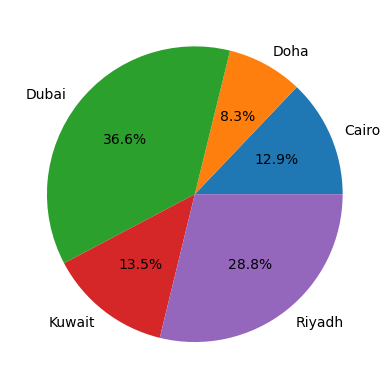

In [96]:
plt.pie(total_jams['JamsCount'], labels=total_jams['City'], autopct='%1.1f%%')

### Travle Time

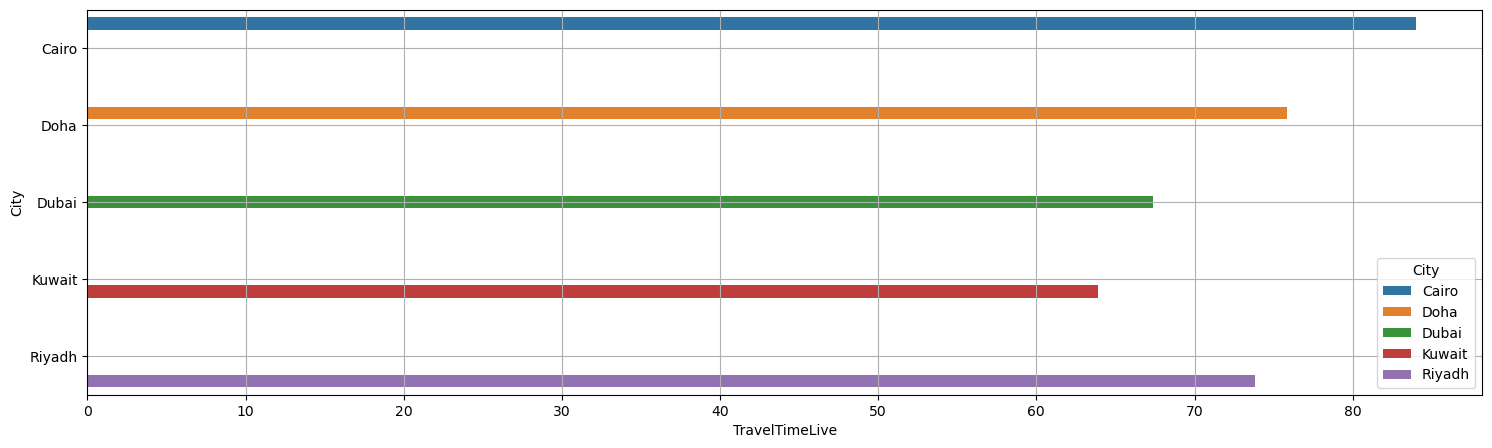

In [97]:
travel_time_12 = months_12.groupby(['City'])['TravelTimeLive'].mean().reset_index()
plt.figure(figsize=(18,5))
sns.barplot(x='TravelTimeLive', y='City',palette='tab10',orient='h', hue='City', data=travel_time_12)
plt.grid()

##### we notce that the highest Travel Time is in Cairo, Were the lowest is in Kuwait 

### Now Let's See Jams By Days.

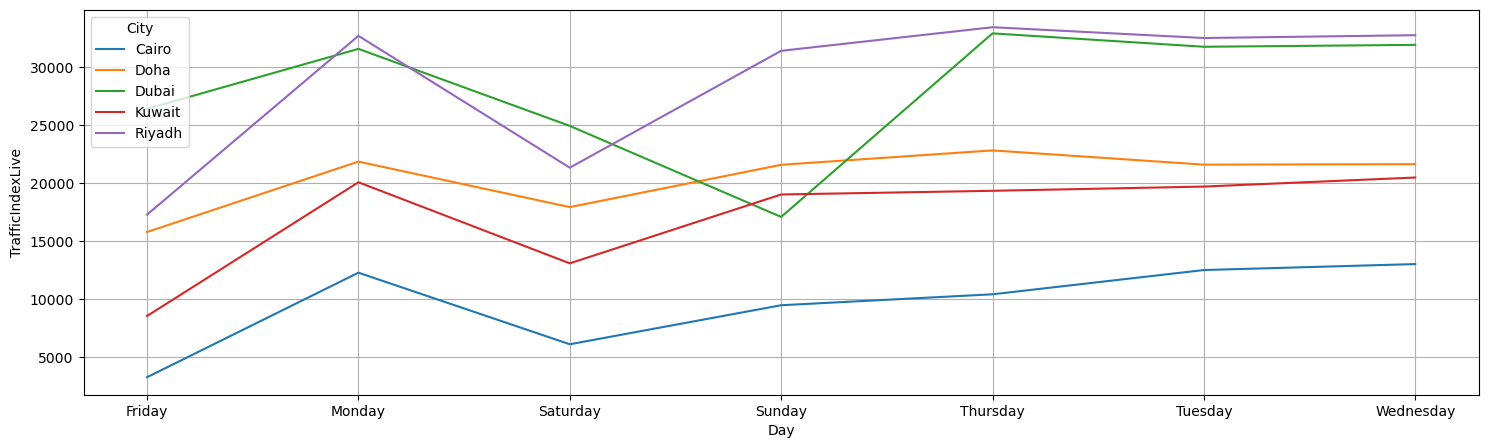

In [98]:
days_jams = months_12.groupby(['Day','City'])['TrafficIndexLive'].sum().reset_index()
days_jams.sort_values(by='Day', ascending=True, inplace=True)
plt.figure(figsize=(18,5))
sns.lineplot(x='Day', y='TrafficIndexLive',palette='tab10', hue='City', data=days_jams)
plt.grid()
plt.show()

**Most Cities Have Low Jams In Friday Considered as their weekend, But Also Dubai Has It's Weekend as Saturday - Sunday**

### Now Let's See Jams By Time Of Day.

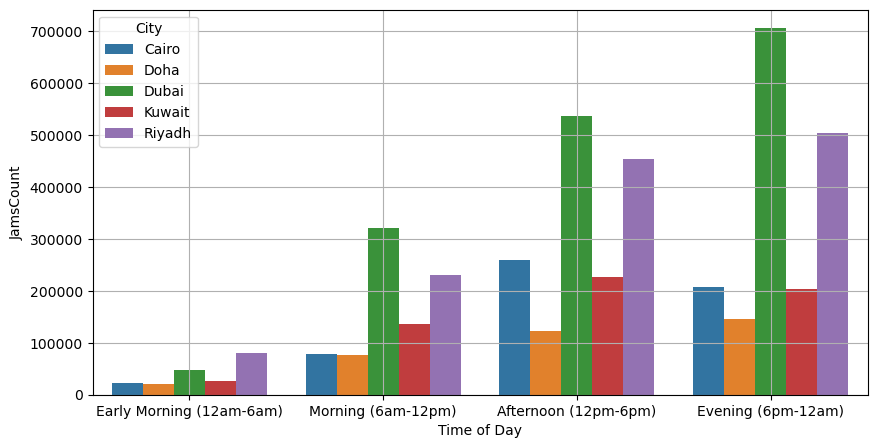

In [99]:
time_jams_by_city = months_12.groupby(['Time of Day','City'])['JamsCount'].sum().reset_index()
plt.figure(figsize=(10,5))
sns.barplot(x='Time of Day', y='JamsCount',palette='tab10', hue='City', data=time_jams_by_city)
plt.grid()
plt.show()

([<matplotlib.patches.Wedge at 0x177380b80>,
 [Text(1.089136085422437, 0.15421604141816828, 'Early Morning (12am-6am)'),
  Text(0.6993440345165427, 0.8490688555035597, 'Morning (6am-12pm)'),
  Text(-0.954877241146632, 0.5460855741916253, 'Afternoon (12pm-6pm)'),
  Text(0.3357399067342899, -1.047510723107907, 'Evening (6pm-12am)')],
 [Text(0.5940742284122383, 0.08411784077354632, '4.5%'),
  Text(0.38146038246356867, 0.46312846663830526, '19.1%'),
  Text(-0.5208421315345264, 0.2978648586499774, '36.3%'),
  Text(0.18313085821870353, -0.5713694853315856, '40.1%')])

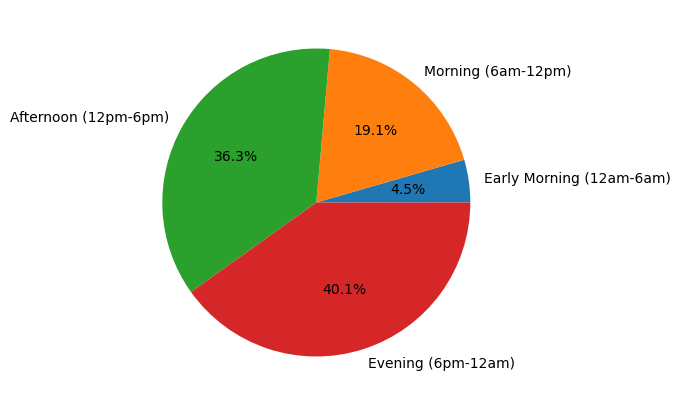

In [100]:
time_jams = months_12.groupby(['Time of Day'])['JamsCount'].sum().reset_index()
plt.figure(figsize=(5,5))
plt.pie(time_jams['JamsCount'], labels=time_jams['Time of Day'], autopct='%1.1f%%')

**It's Noticeable that most jams occur From 12pm To 12am**

# Conclusion

1. Most Of Cities Have Lower Jams on weekends.
2. Dubai Has The Highest Total Jams as well as Jams Delay.
3. While Kuwait Has Higher Amount of jams than Cairo, it seems to have lower Jams Delay.
4. Most of jams occur from 12pm to 12am.
5. Cairo Has The Highest Travel Time With Average Of 80+ Min.

# Pre-processing Data

### Now we will do the necessary preprossing for the (Month_12) Data 

In [101]:
# Remove unnecessary  columns
months_12.drop(columns=['JamsDelay', 'JamsCount', 'JamsLength','TrafficIndexWeekAgo','Time of Day',], axis=1, inplace=True)
months_12

,City,Datetime,TrafficIndexLive,TravelTimeHistoric,TravelTimeLive,Year,Month,MonthNum,Day,DayNum,Hour
7728,Cairo,2022-12-16 11:01:30,0,70.706601,70.048451,2022,December,12,Friday,4,11
7729,Cairo,2022-12-16 12:01:30,0,70.706601,70.048451,2022,December,12,Friday,4,12
7730,Cairo,2022-12-16 13:01:30,0,70.706601,70.048451,2022,December,12,Friday,4,13
7731,Cairo,2022-12-16 14:01:30,0,70.706601,70.048451,2022,December,12,Friday,4,14
7732,Cairo,2022-12-16 15:46:30,2,70.706601,70.048451,2022,December,12,Friday,4,15
...,...,...,...,...,...,...,...,...,...,...,...
66634,Riyadh,2023-12-15 03:01:30,8,63.926569,63.245473,2023,December,12,Friday,4,3
66635,Riyadh,2023-12-15 04:31:30,6,59.182641,60.012955,2023,December,12,Friday,4,4
66636,Riyadh,2023-12-15 05:01:30,3,57.746816,57.561438,2023,December,12,Friday,4,5
66637,Riyadh,2023-12-15 06:01:30,0,56.535277,55.463218,2023,December,12,Friday,4,6


In [102]:
print(months_12)
months_12.info()

         City            Datetime  TrafficIndexLive  TravelTimeHistoric  \
7728    Cairo 2022-12-16 11:01:30                 0           70.706601   
7729    Cairo 2022-12-16 12:01:30                 0           70.706601   
7730    Cairo 2022-12-16 13:01:30                 0           70.706601   
7731    Cairo 2022-12-16 14:01:30                 0           70.706601   
7732    Cairo 2022-12-16 15:46:30                 2           70.706601   
...       ...                 ...               ...                 ...   
66634  Riyadh 2023-12-15 03:01:30                 8           63.926569   
66635  Riyadh 2023-12-15 04:31:30                 6           59.182641   
66636  Riyadh 2023-12-15 05:01:30                 3           57.746816   
66637  Riyadh 2023-12-15 06:01:30                 0           56.535277   
66638  Riyadh 2023-12-15 07:01:30                 0           56.126417   

       TravelTimeLive  Year     Month  MonthNum     Day  DayNum  Hour  
7728        70.048451  2022

### Creating New Columns For Year, Month, Day, Hour

In [103]:
months_12['Datetime'] = pd.to_datetime(months_12['Datetime'])

# Now you can access datetime properties using .dt
months_12['Year'] = months_12['Datetime'].dt.year
months_12['Month'] = months_12['Datetime'].dt.month_name()
months_12['MonthNum'] = months_12['Datetime'].dt.month
months_12['Day'] = months_12['Datetime'].dt.day_name()
months_12['DayNum'] = months_12['Datetime'].dt.dayofweek
months_12['Hour'] = months_12['Datetime'].dt.hour

#months_12.head()

### Let's Create Time of Day Column

In [106]:
bins= np.linspace(df['Hour'].min(), months_12['Hour'].max(), 5)
labels = ['Early Morning (12am-6am)', 'Morning (6am-12pm)', 'Afternoon (12pm-6pm)', 'Evening (6pm-12am)']

months_12['Time of Day'] = pd.cut(months_12['Hour'], bins=bins, labels=labels, include_lowest=True)
months_12.head()


,City,Datetime,TrafficIndexLive,TravelTimeHistoric,TravelTimeLive,Year,Month,MonthNum,Day,DayNum,Hour,Cities_encoded,Time of Day
7728,Cairo,2022-12-16 11:01:30,0,70.706601,70.048451,2022,December,12,Friday,4,11,1,Morning (6am-12pm)
7729,Cairo,2022-12-16 12:01:30,0,70.706601,70.048451,2022,December,12,Friday,4,12,1,Afternoon (12pm-6pm)
7730,Cairo,2022-12-16 13:01:30,0,70.706601,70.048451,2022,December,12,Friday,4,13,1,Afternoon (12pm-6pm)
7731,Cairo,2022-12-16 14:01:30,0,70.706601,70.048451,2022,December,12,Friday,4,14,1,Afternoon (12pm-6pm)
7732,Cairo,2022-12-16 15:46:30,2,70.706601,70.048451,2022,December,12,Friday,4,15,1,Afternoon (12pm-6pm)


### Now let's ctreate a column that assign each city name to a unique number to help us in the training step

In [108]:
city_to_number = {
    'Cairo': 1,
    'Doha': 2,
    'Dubai': 3,
    'Kuwait': 4,
    'Riyadh': 5
}
months_12['Cities_encoded'] = months_12['City'].map(city_to_number)

months_12

,City,Datetime,TrafficIndexLive,TravelTimeHistoric,TravelTimeLive,Year,Month,MonthNum,Day,DayNum,Hour,Cities_encoded,Time of Day
7728,Cairo,2022-12-16 11:01:30,0,70.706601,70.048451,2022,December,12,Friday,4,11,1,Morning (6am-12pm)
7729,Cairo,2022-12-16 12:01:30,0,70.706601,70.048451,2022,December,12,Friday,4,12,1,Afternoon (12pm-6pm)
7730,Cairo,2022-12-16 13:01:30,0,70.706601,70.048451,2022,December,12,Friday,4,13,1,Afternoon (12pm-6pm)
7731,Cairo,2022-12-16 14:01:30,0,70.706601,70.048451,2022,December,12,Friday,4,14,1,Afternoon (12pm-6pm)
7732,Cairo,2022-12-16 15:46:30,2,70.706601,70.048451,2022,December,12,Friday,4,15,1,Afternoon (12pm-6pm)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66634,Riyadh,2023-12-15 03:01:30,8,63.926569,63.245473,2023,December,12,Friday,4,3,5,Early Morning (12am-6am)
66635,Riyadh,2023-12-15 04:31:30,6,59.182641,60.012955,2023,December,12,Friday,4,4,5,Early Morning (12am-6am)
66636,Riyadh,2023-12-15 05:01:30,3,57.746816,57.561438,2023,December,12,Friday,4,5,5,Early Morning (12am-6am)
66637,Riyadh,2023-12-15 06:01:30,0,56.535277,55.463218,2023,December,12,Friday,4,6,5,Morning (6am-12pm)


Now we drop the columns that we do not need in the modeling phase

In [109]:
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns")
df.info()
df.nunique()

Dataset contains 66639 rows and 16 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66639 entries, 0 to 66638
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   City                 66639 non-null  object        
 1   Datetime             66639 non-null  datetime64[ns]
 2   TrafficIndexLive     66639 non-null  int64         
 3   JamsCount            66639 non-null  int64         
 4   JamsDelay            66639 non-null  float64       
 5   JamsLength           66639 non-null  float64       
 6   TrafficIndexWeekAgo  66639 non-null  int64         
 7   TravelTimeHistoric   66639 non-null  float64       
 8   TravelTimeLive       66639 non-null  float64       
 9   Year                 66639 non-null  int64         
 10  Month                66639 non-null  object        
 11  MonthNum             66639 non-null  int64         
 12  Day                  66639 non-null  object  

City                      11
Datetime               22242
TrafficIndexLive         102
JamsCount                768
JamsDelay              12637
JamsLength              4137
TrafficIndexWeekAgo      102
TravelTimeHistoric     62773
TravelTimeLive         62773
Year                       2
Month                     12
MonthNum                  12
Day                        7
DayNum                     7
Hour                      24
Time of Day                4
dtype: int64

### Visualization the new data after cleaning

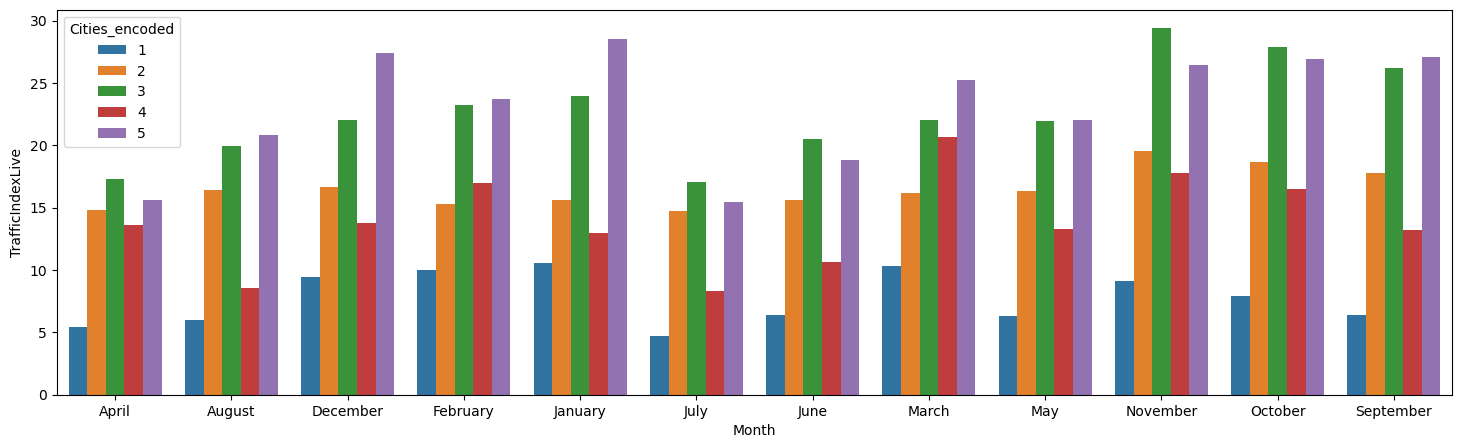

In [113]:
monthly = months_12.groupby(['Cities_encoded', 'Month'])['TrafficIndexLive'].mean().reset_index()

# Now 'monthly' DataFrame should have columns 'Cities encoded', 'Month', and 'TrafficIndexLive'

plt.figure(figsize=(18,5))
sns.barplot(x='Month', y='TrafficIndexLive', palette='tab10', hue='Cities_encoded', data=monthly)
plt.show()


# Moduling stage

#### we are goint to try using three diffrenet models: 
1. linear regression
2. gradient boosted regression
3. random forest 
##### and after evaluating , we will decide what best to go with 


In [114]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [117]:
traffic_index_range = months_12['TrafficIndexLive'].unique()
traffic_index_range = max(traffic_index_range) - min(traffic_index_range)
print(traffic_index_range)

138


### we can see that the range of Traffic index is 138 , meaning the more the predicted value approch 138, the higher the traffic would be.

***Now our goal is to predict the TrafficIndex for each city in a specefic year/month/day/time of the day***

In [118]:
X = months_12[['Cities_encoded', 'Year', 'MonthNum','DayNum', 'Hour', ]]
y = months_12['TrafficIndexLive']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [119]:
prediction_model = RandomForestRegressor(n_estimators=100, max_depth=13, random_state=42)
prediction_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=13, random_state=42)

In [120]:
y_pred = prediction_model.predict(X_test)

In [121]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

r2_score = prediction_model.score(X_test, y_test)
print(f'R-squared: {r2_score}')

Mean Squared Error: 29.212561188440457
R-squared: 0.8605075718172679


In [122]:
def predict(city , year, month, day, hour):
    data = np.array([city, year, month, day, hour])
    data = data.reshape(1,-1)
    predicted = prediction_model.predict(data)
    print(f"Predicted Traffic Index is: {predicted}")

In [124]:
print('Welcome to Achivers program!\n\n')
city_name = input('In what City would you like to know the approximate Traffic?\n(Riyadh, Cairo, Doha, Dobai, Kuwait)')
if (city_name.lower().strip()  == 'riyadh'):
    city = 5
elif(city_name.lower().strip()  == 'cairo'):
    city = 1
elif (city_name.lower().strip()  == 'doha'):
    city = 2
elif(city_name.lower().strip()  == 'kuwait'):
    city = 4
elif(city_name.lower().strip()  == 'dubai'):
    city = 3
else:
    print("Sorry , we don't have enough information about the city that you are looking for")
    
year = int(input('Enter the year: '))

month = int(input('What the number of the month? '))

day_name = input('What about the day? ')
if (day_name.lower().strip() == 'tuesday'):
    day = 3
elif(day_name.lower().strip()  == 'wednesday'):
    day = 4
elif (day_name.lower().strip()  == 'thursday'):
    day = 5
elif(day_name.lower().strip()  == 'friday'):
    day = 6
elif(day_name.lower().strip()  == 'saturday'):
    day = 0
elif(day_name.lower().strip()  == 'sunday'):
    day = 1
elif(day_name.lower().strip()  == 'monday'):
    day = 2
else:
    print("please make sure you write the name of the dat correctly")


hour = int(input('The Hour? '))

predict(city, year, month, day, hour)

Welcome to Achivers program!


Predicted Traffic Index is: [59.59844114]
